# Day 6

## Part 1

- Boats charge up for n $ms$ before moving at n $mms^{-1}$ for the remainder of the race.
- Find the number of ways you could beat the best time for each race record.
- The answer is the product of all these values.

In [5]:
from dataclasses import dataclass
import tqdm
from matplotlib import pyplot as plt

from advent_of_code_utils.advent_of_code_utils import (
    ParseConfig, parse_from_file, markdown
)

In [10]:
def extract_numbers(number_string: str) -> list[int]:
    """extracts the numbers from the day 6 input"""
    return [int(value) for value in number_string.split(' ') if value != '']

parser = ParseConfig('\n', ParseConfig(':', [str, extract_numbers]))

stat_lists = parse_from_file('puzzle_input\\day_6.txt', parser)


test_stat.get_possible()=[0, 6, 10, 12, 12, 10, 6, 0]
test_stat.winners=4


Text(0.5, 1.0, 'Quadratic and blast!')

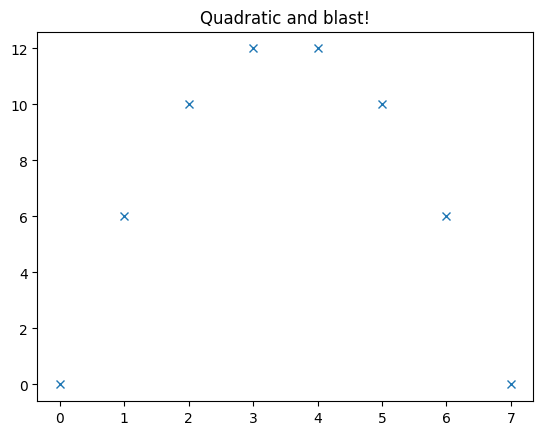

In [18]:
@dataclass
class Stat:
    time: int
    distance: int

    def get_possible(self) -> list[int]:
        """returns a list of distances possible for this stat"""
        self.possible = [
            hold_time * (self.time - hold_time)
            for hold_time in range(self.time + 1)
        ]
        return self.possible

    @property
    def winners(self) -> int:
        """counts the number of winners from the self.possible"""
        return sum([outcome > self.distance for outcome in self.possible])
    
    def plot(self, ax: plt.Axes) -> None:
        """Adds this stat's possible outcomes to an axis"""
        ax.plot(
            list(range(self.time + 1)), self.possible,
            marker='x', linestyle=''
        )


test_stat = Stat(7, 9)
print(f'{test_stat.get_possible()=}')
print(f'{test_stat.winners=}')
fig, ax = plt.subplots()
test_stat.plot(ax)
ax.set_title('Quadratic and blast!')

(-8.190000000000001, 86.19000000000001, -76.05, 1597.05)

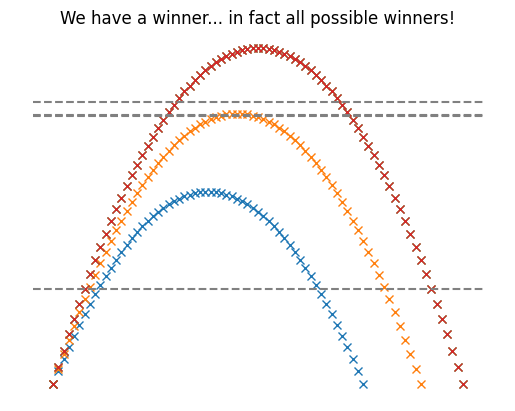

In [43]:
# ok now for real
stats = [Stat(*values) for values in zip(*[values for _, values in stat_lists])]

fig, ax = plt.subplots()
product = 1
for stat in stats:
    stat.get_possible()
    stat.plot(ax)
    product *= stat.winners
ax.set_title('We have a winner... in fact all possible winners!')
x_lim = ax.get_xlim()
for stat in stats:
    ax.plot(x_lim, [stat.distance]*2, linestyle='--', color='gray')
ax.axis('off')  # remove ticks don't want to give away the input!

In [27]:
markdown(
    '### Solution',
    f'The product of all winning outcomes is: {product}'
)

### Solution
The product of all winning outcomes is: 227850

## Part 2

- I'm not entirely sure what kerning is but just ignore the spaces and redo for one mega race!

In [54]:
from math import ceil, floor

In [41]:
def extract_the_number(number_string: str) -> int:
    """Returns the number from the string ignoring spaces"""
    return int(number_string.replace(' ', ''))

new_parser = ParseConfig('\n', ParseConfig(':', [str, extract_the_number]))

raw_stats = parse_from_file('puzzle_input\\day_6.txt', new_parser)


The problem can be reduced to solving a quadratic equation of the form:
$$
(T - t)t = d
$$
which can be rearranged to:
$$
t^2 - Tt + d = 0
$$
Where the standard quadratic coefficients are:
$$
a = 1, b = -T, c = d
$$

In [63]:
def find_roots(b: int, c: int) -> list[float, float]:
    """
    find the roots if a = 1 of the quadratic for the coefficients provided
    """
    return [(-b + k * (b**2 - 4 * c)**0.5) / 2 for k in (1, -1)]

print(test_stat)
print(f'{find_roots(-test_stat.time, test_stat.distance)=}')

Stat(time=7, distance=9)
find_roots(-test_stat.time, test_stat.distance)=[5.302775637731995, 1.6972243622680054]


Then the only remaining step is to find the number of integers between those two values

In [66]:
def number_of_solutions(stat: Stat) -> int:
    """finds the number of solutions for a given stat"""
    roots = find_roots(-stat.time, stat.distance)
    return 1 + floor(max(roots)) - ceil(min(roots))

print(
    f'for {test_stat=} the number of winning solutions is: '
    f'{number_of_solutions(test_stat)=}')

for test_stat=Stat(time=7, distance=9) the number of winning solutions is: number_of_solutions(test_stat)=4


In [67]:
mega_stat = Stat(*[value for _, value in raw_stats])

markdown(
    '### Solution',
    f'The number of possible winning solutions is: {number_of_solutions(mega_stat)}'
)

### Solution
The number of possible winning solutions is: 42948149